<a href="https://colab.research.google.com/github/SargisGasparyan/MyRpojectN1/blob/master/Automobile_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import log,sqrt

In [0]:
data=pd.read_csv(r'/content/drive/My Drive/Automobile_data.csv',encoding='latin')

In [679]:
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,2,0,0,0,1,0,0,0,2,1,0,1,1,1,1,1,1,1,-1,3,2,2,1,1,1,0,0,0,0,0,...,1,1,2,2,2,2,2,2,-1,-1,-1,-1,-1,3,3,-1,-1,2,2,2,2,2,2,2,3,3,0,0,0,-2,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,?,?,?,164,164,?,158,?,158,?,192,192,188,188,?,?,?,?,121,98,81,118,118,118,148,148,148,148,110,145,137,137,101,101,101,110,78,106,106,85,...,168,168,134,134,134,134,134,134,65,65,65,65,65,197,197,90,?,122,122,94,94,94,94,94,?,256,?,?,?,103,74,103,74,103,74,95,95,95,95,95
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,bmw,bmw,bmw,bmw,bmw,bmw,bmw,bmw,chevrolet,chevrolet,chevrolet,dodge,dodge,dodge,dodge,dodge,dodge,dodge,dodge,dodge,honda,honda,honda,honda,honda,honda,honda,honda,honda,honda,...,toyota,toyota,toyota,toyota,toyota,toyota,toyota,toyota,toyota,toyota,toyota,toyota,toyota,toyota,toyota,toyota,toyota,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volkswagen,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas,gas,gas,gas,gas,gas,gas,diesel,gas,diesel,gas,gas,diesel,gas,gas,gas,gas,diesel,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,std,std,std,std,std,std,std,std,std,std,std,std,std,turbo,std,std,std,turbo,std,turbo,std,std,std,std,std,std,std,std,std,std,...,std,std,std,std,std,std,std,std,std,turbo,std,std,std,std,std,std,std,std,std,std,std,std,turbo,std,std,std,std,turbo,std,std,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
num-of-doors,two,two,two,four,four,two,four,four,four,two,two,four,two,four,four,four,two,four,two,two,four,two,two,two,four,four,four,?,four,two,two,two,two,two,two,four,four,two,two,four,...,two,two,two,two,two,two,two,two,four,four,four,four,four,two,two,four,four,two,two,four,four,four,four,four,two,two,four,four,four,four,four,four,four,four,four,four,four,four,four,four
body-style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,sedan,sedan,sedan,sedan,sedan,sedan,sedan,sedan,hatchback,hatchback,sedan,hatchback,hatchback,hatchback,hatchback,sedan,sedan,sedan,wagon,hatchback,hatchback,hatchback,hatchback,hatchback,hatchback,sedan,wagon,hatchback,hatchback,sedan,...,sedan,hatchback,hardtop,hardtop,hatchback,hardtop,hatchback,convertible,sedan,sedan,hatchback,sedan,hatchback,hatchback,hatchback,sedan,wagon,sedan,sedan,sedan,sedan,sedan,sedan,sedan,convertible,hatchback,sedan,sedan,wagon,sedan,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,fwd,fwd,fwd,fwd,fwd,rwd,rwd,rwd,rwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,fwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
engine-location,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,101.2,101.2,101.2,101.2,103.5,103.5,103.5,110,88.4,94.5,

In [680]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [0]:
data=data.drop(columns=['normalized-losses'])

In [682]:
data.price.value_counts()
data.loc[data['price'] == '?', 'price'] = '0'
data['price']=data['price'].astype(int)
data.loc[data['price'] == 0, 'price'] = data.price.median()
data.price.value_counts()

10198.0    5
13499.0    2
5572.0     2
7957.0     2
7898.0     2
          ..
9295.0     1
15580.0    1
6377.0     1
30760.0    1
18920.0    1
Name: price, Length: 186, dtype: int64

In [683]:
data.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [684]:
met={0.0:0,1:1,2:2,3:3,-1:4,-2:5}
data.symboling=data['symboling'].map(met)
data.symboling.value_counts()

0    67
1    54
2    32
3    27
4    22
5     3
Name: symboling, dtype: int64

In [685]:
data.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [0]:
data['make'].value_counts()

In [687]:
countmake=data.make.value_counts()
countmake
data.loc[data['make'].isin(['chevrolet','dodge','honda','isuzu','mazda','mitsubishi','nissan','plymouth','renault','subaru','toyota','volkswagen']), 'make'] = 'Other'
data.loc[data['make'].isin(['mercury','peugot','saab','volvo','audi','alfa-romero']), 'make'] = 'Other2'
data.loc[data['make'].isin(['bmw','jaguar','mercedes-benz','porsche']), 'make'] = 'Other3'


data.make.value_counts()

Other     142
Other2     39
Other3     24
Name: make, dtype: int64

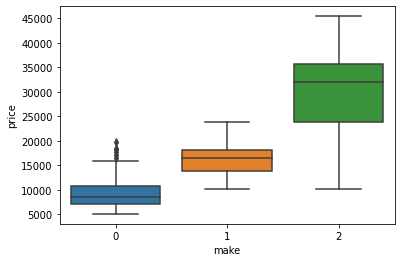

In [688]:
met={'Other':0,'Other2':1,'Other3':2}
data.make=data.make.map(met)
sns.boxplot(x='make',y='price',data=data)


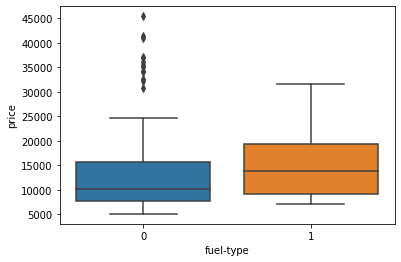

In [689]:
met={'gas':0,'diesel':1}
data['fuel-type']=data['fuel-type'].map(met)
data['fuel-type'].value_counts()
sns.boxplot(x='fuel-type',y='price',data=data)


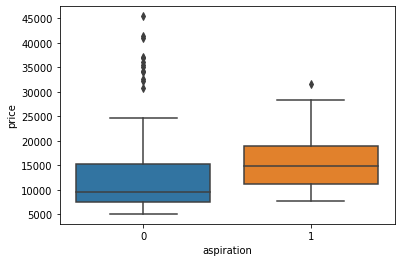

In [690]:
data.aspiration.value_counts()
met={'std':0,'turbo':1}
data['aspiration']=data['aspiration'].map(met)
data['aspiration'].value_counts()
sns.boxplot(x='aspiration',y='price',data=data)

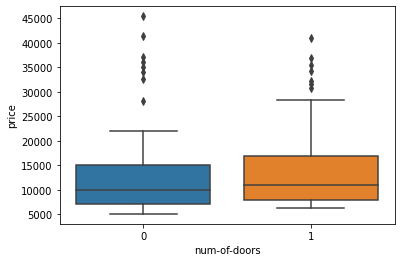

In [691]:
data.loc[data['num-of-doors'] == '?', 'num-of-doors'] = 'two'
data['num-of-doors'].value_counts()
met={'two':0,'four':1}
data['num-of-doors']=data['num-of-doors'].map(met)
data['num-of-doors'].value_counts()
sns.boxplot(x='num-of-doors',y='price',data=data)


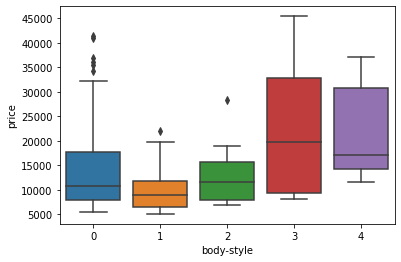

In [692]:
met={'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}
data['body-style']=data['body-style'].map(met)
data['body-style'].value_counts()
sns.boxplot(x='body-style',y='price',data=data)

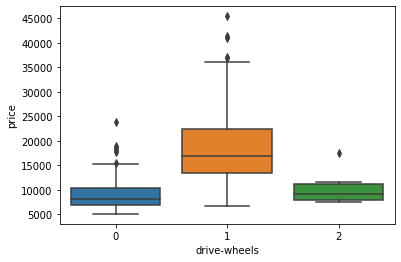

In [693]:
met={'fwd':0,'rwd':1,'4wd':2}
data['drive-wheels']=data['drive-wheels'].map(met)
data['drive-wheels'].value_counts()
sns.boxplot(x='drive-wheels',y='price',data=data)

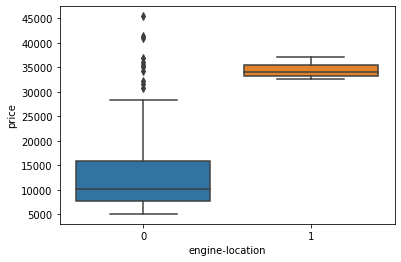

In [694]:
met={'front':0,'rear':1}
data['engine-location']=data['engine-location'].map(met)
data['engine-location'].value_counts()
sns.boxplot(x='engine-location',y='price',data=data)

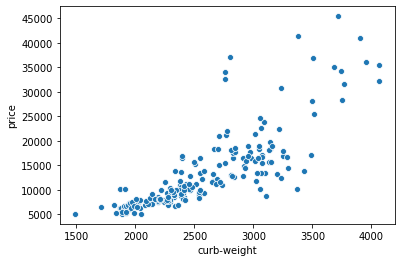

In [695]:
sns.scatterplot(x='curb-weight',y='price',data=data)

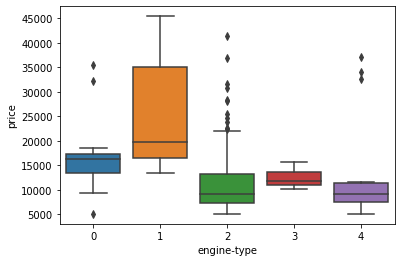

In [696]:

data.loc[data['engine-type'] == 'l', 'engine-type'] = 'dohc'
data.loc[data['engine-type'] == 'dohcv', 'engine-type'] = 'rotor'
met={'dohc':0,'ohcv':1,'ohc':2,'rotor':3,'ohcf':4}
data['engine-type']=data['engine-type'].map(met)
sns.boxplot(x='engine-type',y='price',data=data)

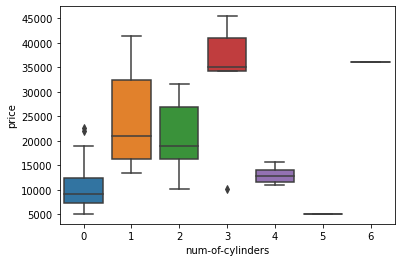

In [697]:
met={'four':0,'six':1,'five':2,'eight':3,'two':4,'three':5,'twelve':6}
data['num-of-cylinders']=data['num-of-cylinders'].map(met)
data['num-of-cylinders'].value_counts()
sns.boxplot(x='num-of-cylinders',y='price',data=data)

0    94
1    66
2    20
3    11
4     9
5     3
7     1
6     1
Name: fuel-system, dtype: int64

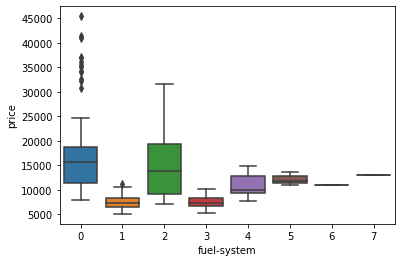

In [698]:
met={'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'spfi':6,'mfi':7}
data['fuel-system']=data['fuel-system'].map(met)
sns.boxplot(x='fuel-system',y='price',data=data)
data['fuel-system'].value_counts()

In [0]:
data.loc[data.bore =='?','bore']='0'
data.bore=data.bore.astype(float)
data.loc[data.bore==0,'bore']=data.bore.median()

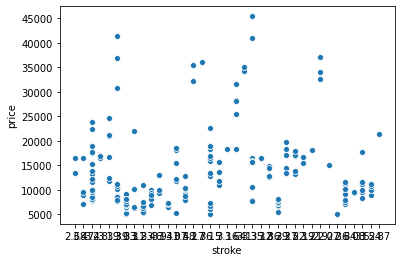

In [700]:
sns.scatterplot(x='stroke',y='price',data=data)
data.loc[data.stroke =='?','stroke']='0'
data.stroke=data.stroke.astype(float)
data.loc[data.stroke==0,'stroke']=data.stroke.median()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


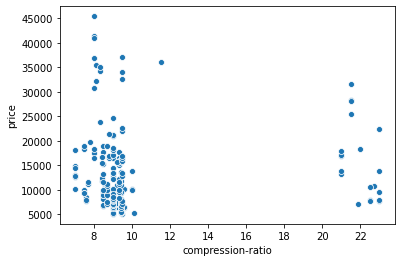

In [701]:
data['compression-ratio'].value_counts()
sns.scatterplot(x='compression-ratio',y='price',data=data)
data.loc[data.stroke =='?','stroke']='0'
data.stroke=data.stroke.astype(float)
data.loc[data.stroke==0,'stroke']=data.stroke.median()

In [0]:
sns.scatterplot(x='horsepower',y='price',data=data)
data.loc[data.horsepower =='?','horsepower']='0'
data.horsepower=data.horsepower.astype(float)
data.loc[data.horsepower==0,'horsepower']=data.horsepower.median()

In [0]:
sns.scatterplot(x='peak-rpm',y='price',data=data)
data.loc[data['peak-rpm'] =='?','peak-rpm']='0'
data['peak-rpm']=data['peak-rpm'].astype(float)
data.loc[data['peak-rpm']==0,'peak-rpm']=data['peak-rpm'].median()

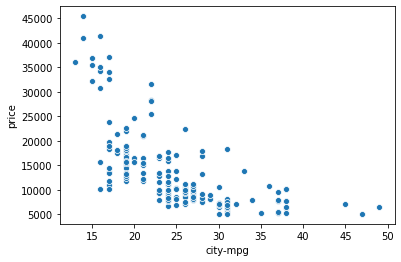

In [704]:
data['city-mpg'].value_counts()
sns.scatterplot(x='city-mpg',y='price',data=data)

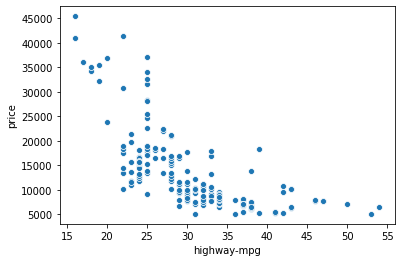

In [705]:
data['highway-mpg'].value_counts()
sns.scatterplot(x='highway-mpg',y='price',data=data)

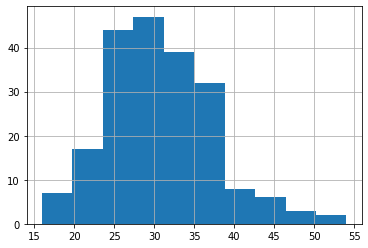

In [706]:
data['highway-mpg'].hist()

In [0]:
data['make']=data['make'].astype('str')
data['fuel-type']=data['fuel-type'].astype('str')
data['aspiration']=data['aspiration'].astype('str')
data['num-of-doors']=data['num-of-doors'].astype('str')
data['body-style']=data['body-style'].astype('str')
data['drive-wheels']=data['drive-wheels'].astype('str')
data['engine-location']=data['engine-location'].astype('str')
data['engine-type']=data['engine-type'].astype('str')
data['num-of-cylinders']=data['num-of-cylinders'].astype('str')
data['fuel-system']=data['fuel-system'].astype('str')

In [0]:
x=pd.get_dummies(data[['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']])

In [0]:
data = data.join(x)
data.drop(['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'], axis=1, inplace=True)

In [0]:
from sklearn.model_selection import cross_val_score,train_test_split

(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data.drop('price', axis=1),
                                            data['price'],
                                            test_size=0.3, 
                                            random_state=5)

In [0]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rfr = RandomForestRegressor(max_depth=None,n_estimators=85,min_samples_split=3)
rfr.fit(trainData,trainDependentVariables)
preds = rfr.predict(testData)
# from sklearn.linear_model import LinearRegression
# regressionModel = LinearRegression()
# regressionModel.fit(trainData, trainDependentVariables)
# preds = regressionModel.predict(testData)

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [0]:
mse = mean_squared_error(y_pred=preds,
                         y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_pred=preds,
                          y_true=testDependentVariables)


R2 = r2_score(y_pred=preds, 
                      y_true=testDependentVariables)

R2_tr = r2_score(y_pred=rfr.predict(trainData), 
                      y_true=trainDependentVariables)
cv= cross_val_score(rfr,
                    data.drop('price', axis=1),
                    data['price'],
                    cv = 5).mean()

In [0]:
print("MSE:   {}\nRMSE:  {}\nR2:    {}\nR2 train:    {}\nMAE:   {}\n5-fold cv {}"
.format(mse, rmse,R2,R2_tr,mae,cv))